# **100 Days of Machine Learning**

**Steps in ML Development Cycle**
1. Frame the problem
2. Gathering data
3. Data preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering and selection
6. Model training + evaluation + Selection
7. Model deployment
8. Testing
9. Optimization

# **Gathering Data**
1. CSV
2. SQL
3. API
4. Web scraping

**Working with CSV**
* **Arguments used while pd.read_csv()**
1. sep='\t'......................................(to open tab separated files)
2. name=[ ]....................................(to give a top row when not in data)
3. index_col =' '..............................(to make a column index)\\
4. skiprows=[ ]...............................(when we want to skip rows with/without a pattern)
5. nrows=[ ]....................................(when we want a smaller psrt of the dataset)
6. encoding=' '................................(when we want to change the encoding)
7. error_bad_lines= False .............(used when we see **PARSER ERROR**.It helps skip the lines with bad data)
8. dtypes={'column':'data type'}... (used to change data type of column)
9. parse_dates=['column']............ (used to assign certain columns as datetime)
10. na_values=['value']................... (when we want to point certain value as NA)
11. chunksize= ...............................(used to break huge data set into smaller chunks and then operations are done in loop over all the chunks)

---




**Working with SQL**

*   **How to connect MySQL to Python**

1. import mysql.connector
2. conn= mysql.connector.connect(host='localhost',user='root',password='',database=' ')
3. pd.read_sql_query("SQL query",conn)

---



**Working with API in Pandas**

*   after getting the data from API in JSON format

import pandas as pd

import requests

response =requests.get(' ')

df = pd.DataFrame(response.json( ) ['results']) [['id','title,...,,']]

*   **If we have a total of 428 pages of data so we'll run a loop make the complete df**


for i in range(1,429):

  response =requests.get(' ')

  temp_df = pd.DataFrame(response.json() ['results'])[['id','title,...,,']]

  df = pd.concat([df,temp_df],ignore_index=True)
  
*   **To convert the given data into CSV**
  
df.to_csv(name.csv)

---








# **Exploratory Data Analysis**

Initial Questions to data

* How big is the data ---------------------.shape

* How does data look like -------------.sample()

* What are the data types -------------.info()

* Are there any missing values -----.isnull().sum()

* Duplicates hai?? -------------------------.duplicated().sum()

* Is there any correlation ---------------.corr()

https://youtu.be/E69Lg2ZgOxg?si=gP79GbxeFvz36r_K
  

*   Use of **Panda Profiler** is done to do efficient EDA


---









In [ ]:
import pandas as pd
df = pd.read_csv('/content/trains.csv')
from ydata_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##**Feature Engineering**
  **Feature scaling (Standardization)**
  
$$X_{scaled} = \frac{X - X_{mean}}{X_{stddev}}$$








In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,-1],test_size=0.2,random =42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#converting Numpy array to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

**Where to use standardization**

1. K-means
2. KNN
3. Principle Component Analysis
4. ANN
5. Gradient descent

**Feature Scaling (Normalization)**

$$X_{scaled} = \frac{X_i - min(X)}{max(X) - min(X)}$$

Scales everything between 0 and 1 and it can change the mean of the data a lil bit

**Feature Scaling (MaxAbsScaling)**

$$X'_i = \frac{X_i}{abs(X_{max})}$$\
When we have sparse data

**Feature Scaling (Robust Scaling)**

$$X' = \frac{x - \text{median}(x)}{\text{IQR}}$$
Used when we have to deal with the outliers


---

## **Dealing with categorical data**

*   There are two types of categorical data
  1.   Nominal data - Data where there is no order among given unique values of the data
  2.  Ordinal data - Data which can be arranged in order among given unique values of the data
  3. Label encoding - used only in the last column

1. **Ordinal encoding**

```
  from sklearn.preprocessing import OrdinalEncoder
  oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
  # Categories will be arranged ordinally; Poor=0,Average=1,Good=2
  oe.fit(X_train)
  X_train = oe.transform(X_train)
  X_test = oe.transform(X_test)
```
  2. **Label encoding**

```
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
le.classes_ --------------------------->the library will itself create classes on unique_values and arrange it ordinally
y_train = le.transform(y_train)
y_test = le.transform(y_test)
```
3. **One Hot encoding**

It is used to represent the categorical data in numerical form for the ML model to make sense of it \
If I have N unique values in a categorical column then we will make N-1 no of columns to avoid **Dummy Variable Trap**

















When we run OHE, label encoding and ordinal encoding on different columns of a dataframe, we get no of np arrays which is useless as we have to combine them.\

###  **ColumnTransformer**
**this is how we actually use the above mentioned methods IRL**
```
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
    ],remainder='passthrough')


```

## **How to improve distribution of the data**



Function transformers\
When data is given but the distribution of the data in not normal then certain models like linear regression and logistic regression don't work well on therfore we use: \
1.Log transform --> when data is right skewed\

```
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
# using column transformer we are applying log tranform only on 'fare' column
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)
```


2.Reciprocal tranform --> makes bigger value smaller\
3.Square transform --> when data is left skewed\
4.Squareroot trnsform --> IDK
\
\
**Certain models like decision tree don't care much about the distribution of data**\
**Power transformer class**\
Box-Cox transform- Gives normal distrbution but doesn't work with 0 or -ve values\

```
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})
```
Yeo Jhonson- solves for -ve variable as well and is a bit better


## Binning and Binarization
when we have data but the data is having a huge range and also exeptions, we need to encode the numerical data as well.


> 1. Uniform Binning- The numerical data is divided into bins of **equal size**.
*   No change in spread of the data
*   Outliners are handled very smoothly
*   kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy=uniform)

> 2. Quantile binning- The numerical value is divided into values where first bin has the first 10% of the data.The next bin has 10-20% of the data, the next has20-30% and so on if the given interval is of 10.
*   Outliners are handled very smoothly
*   This is used more as value is spread eqaulling in bins.
*   kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy=quantile)



> 3. K-means algorithm- Interval is called centroid here. uses K-means to find bins.
*  Only use when data is in clusters
*  kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy=kmeans)

---
## Mixed variables

We may encounter 2 types of mixed variables in our data someties in a single column. Eg- B5 or A,S,D,2,5,7,9(in same column).

 Column has mixed nos. and categorical data:

```
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')\
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)
```

Mixed terms like B5...


```
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')
 # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0]
 # captures the first letter
```

---
##Date and Time
When we have a column having date and time in one column it will be automatically labelled as object data type and we have to change it into data time datatype.Using **pd.to_datetime()**

> Date
1. dataset['date']dt.year
2. ['date']dt.month
3. ['date']dt.month_name()
4. ['date'].dt.day_name()
5. dataset['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday',
   'Saturday']), 1,0)
6. date['date_week'] = date['date'].dt.week\
7. Time Elapsed\
import datetime\
today = datetime.datetime.today()\
today - date['date']
8. (today - date['date']).dt.days\
9. time['hour'] = time['date'].dt.hour\
time['min'] = time['date'].dt.minute\
time['sec'] = time['date'].dt.second\
10. (today - time['date'])/np.timedelta64(1,'h')\
hours passed

---



## Handling missing data
**Numerical Data**

First method is to replce the data with mean,median,most_frequent,constant value from a specific column which has missing value in some row.

This method has many disadvantages and there is not used very frequently in professial workflows.
* It changes the variance of the data.
* It create more and more outlyers in the data (checked using boxplot).
* It is used when less than 5% data is missing and missing data is random.
* Covariance and corelation changes

BUT still people use it in projects as it simple to implement-

> imputer1 = SimpleImputer(strategy='median')\
imputer2 = SimpleImputer(strategy='mean')\
Then use column transformer

**Arbitrary value imputation**\
This technique is sometimes used when we have data missing in chunck and not random.It creates a difference in the missing data and other data so that our ML model can identify and may be ignore the missing data. Here we put any random-ass value in every missing place.

**Categorical Data**

1. Replace with mode of the data.
* Used when less than 5% is missing.
* Changes the variance.
* Easy to implement.\
 imputer = SimpleImputer(strategy='most_frequent')


2. Make a separate column for missing data so that it can stand out for the algorithm\
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

**Methods that work for both**\
Random Imputation - randomly pick a no/word from column and place it in missing place
1. It is an easy thing.
2. It does not alter the distribution of the data much.
3. Not good for decsion tree but useful for linear methods.
4. Can't be done in sklearn need to use pandas.
5. Covariance is distured.
6. It is memory heavy method.
7. Outlyer are also not affected.
8. Can't be used when huge amout of data is gone as the change in distribution is very noticeable.

Steps:
> X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values\
**In the null places of Age_imputed we are assigning random value from the given data of Age column**\
\
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)\
plt.legend()\
plt.show()\
**shows that the distribution is fine here**

Missing Indicator - in this method we create a separate column and in that column we mention whether there is missing data or not in a given row.
```
si = SimpleImputer(add_indicator=True)\
X_train = si.fit_transform(X_train)\
X_test = si.transform(X_test)
```
Automatically select best method\
\
K-nearest-neighbour - use nan_eucledian_distance formula to calculate distance between data of missing point's row and then arrange it in ascending order.Take the average of the first k neighbours and put.

> This takes shit ton of memory on server\
This is SLOOOOWW\
This is accurate af.

```
knn = KNNImputer(n_neighbors=3,weights='distance')\
X_train_trf = knn.fit_transform(X_train)\
X_test_trf = knn.transform(X_test)
```
MICE[Multivariate imputation by Chained Equation] - This technique is used to  fill the missing data by using other columns of the same row(since they have a relation in between).

>This takes shit ton of memory on sever\
This is SLOOOOWW\
This is quite accurate af.

****






##Outliers
\
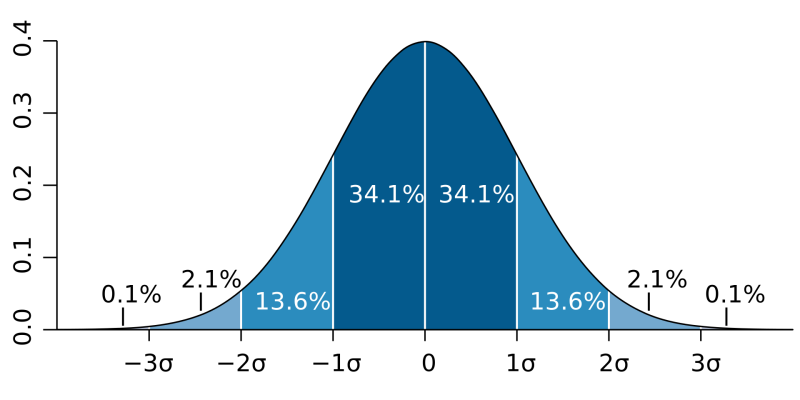

**Z-score** - This method is used when we have a bell curve in our data.
to find outlier we add and subtract 3 times the standard deviation on the mean. Whatever lyes beyond that is an outlier.
\
$$Z = \frac{x - \mu}{\sigma}$$
After this we can either just **delete/trim the outliers.**\
new_df = df[df['placement_exam_marks'] < upper_limit]\
OR\
We can **cap it at certain limit.**
```
new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']))
```

**IQR method**- This method is used when we have a data that is skewed.
Steps:
* First plot a boxplot of the data.
* Find the IQR of the data (75%ile-25%ile)
* ADD 1.5(IQR) to 75%ile or Q3 and Subtract 1.5(IQR) from 25%ile or Q1
* Whatever lies beyond these points is an oulier
* Trim it or Cap it.

**Percentile method**- Very simple method just select a %ile which will be subtracted from top and bottom of the data.\
Eg- for 5%ile data below 5%ile and above 95%ile will be outliers.Trim it or cap it.

****

##Principle Component Analysis
> It is used to convert higher dimentional data into lower dimentional data.\
It make computation easy \
It make Visualisation possible for data >3D\

Formula
$$cov(X,Y)=\frac{1}{n}\sum_{i=1}^{n}(x-\overline{x})(y-\overline{y})$$
cov(X, Y) → Covariance between X & Y variables\
x & y → members of X & Y variables\
$\overline{x}$ & $\overline{y}$ → mean of X & Y variables
n → number of members

* Variance informs us how data is spread on one axis
* In PCA we tilt the axis and take projection of the data points on the axis and then whichever axis has more variance is used.
* Then we use covarience which tells us the relation between X-Y axis.

* To get a complete understanding of data we use Covarience matrix.\
$\begin{bmatrix}
x & var(x) & cov(x, y) \\
y & cov(x, y) & var(y)
\end{bmatrix}$

$\begin{bmatrix}
x & var(x) & cov(x, y) & cov(x, z) \\
y & cov(x, y) & var(y) & cov(y, z) \\
z & cov(x, z) & cov(y, z) & var(z)
\end{bmatrix}$
* Then we have to eigen decomposition of the covarience matrix and find the eigen vector(s) and eigen value(s)
* The largest eigen vector will have the highest variance on it. Therefore that will be our unit vector(s)/principle component(s).   

https://youtu.be/tofVCUDrg4M?si=3ICFl9jOKJqNYKND \
(VERY IMPORTANT VID)
